## FASE 5: DATA VISUALIZATION & STORYTELLING

In [ ]:
import os
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display


df = pd.read_csv("data/processed/F1_Integrated_Features.csv")
df.replace("\\N", np.nan, inplace=True)
df.columns = [c.lower() for c in df.columns]


os.makedirs("results/visualizations", exist_ok=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_19796\280296554.py:12: DtypeWarning: Columns (4,37,39,41,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/processed/F1_Integrated_Features.csv")


### Dashboard 1: Historical Overview

	• Championship winners timeline
	• Constructor dominance eras
	• Key statistics evolution

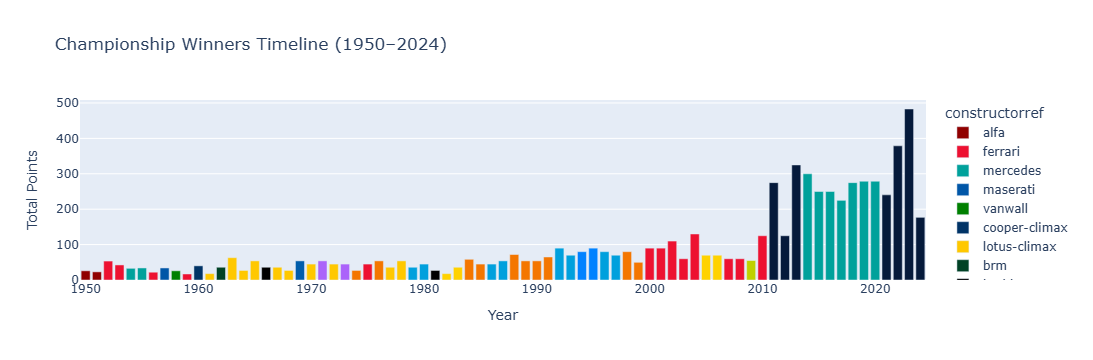

In [11]:
# Championship winners timeline
winners = (
    df[df['position'] == 1]
    .groupby(['year', 'driverref', 'constructorref'])
    ['points']
    .sum()
    .reset_index()
)
winners_top = winners.loc[winners.groupby('year')['points'].idxmax()]

color_map = {
    'alfa': '#900000',
    'aston_martin': '#037A68',
    'alpine': '#F282B4',
    'alpha_tauri': '#2B4562',
    'ferrari': '#ED1131',
    'mercedes': '#00A19B',
    'maserati': '#0056A7',  
    'vanwall': '#008000',   
    'cooper-climax': '#003366',  
    'lotus-climax': '#FFC800',
    'brm': '#004225',
    'brabham-repco': '#000000',  
    'lotus-ford': '#FFC800',
    'matra-ford': '#005DAB',     
    'team_lotus': '#FFC800',
    'tyrell': '#004F9F',
    'mclaren': '#F47600',
    'williams': '#00A0DD',
    'brabham': '#000000',        
    'renault': '#FFD200',
    'benetton': '#0082FF',
    'brawn': '#BFD000',
    'red_bull': '#051A3B'
}


fig_champ = px.bar(
    winners_top,
    x='year', y='points', color='constructorref',
    hover_data=['driverref'],
    title="Championship Winners Timeline (1950–2024)",
    color_discrete_map=color_map,
)
fig_champ.update_layout(xaxis_title="Year", yaxis_title="Total Points")
fig_champ.write_html("results/visualizations/dashboard1_championship_timeline.html")
fig_champ.show()


C:\Users\Hp\AppData\Local\Temp\ipykernel_21440\2997895873.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Hp\AppData\Local\Temp\ipykernel_21440\2997895873.py:16: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



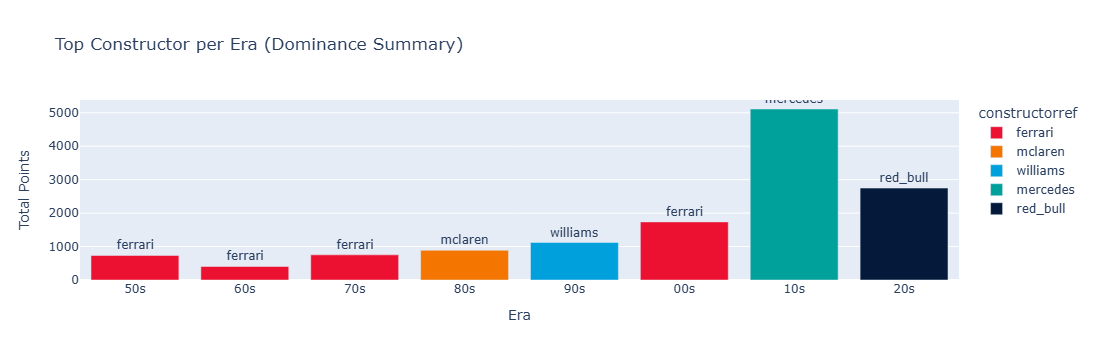

In [ ]:
# Constructor dominance over eras
df['era'] = pd.cut(
    df['year'],
    bins=[1950, 1959, 1969, 1979, 1989, 1999, 2009, 2019, 2024],
    labels=['50s', '60s', '70s', '80s', '90s', '00s', '10s', '20s']
)

# Calculate the total points per constructor in each era
era_dominance = (
    df.groupby(['era', 'constructorref'])['points']
    .sum()
    .reset_index()
)

top_per_era = era_dominance.loc[
    era_dominance.groupby('era')['points'].idxmax()
].reset_index(drop=True)

era_order = ['50s', '60s', '70s', '80s', '90s', '00s', '10s', '20s']

fig_dom = px.bar(
    top_per_era,
    x='era', y='points', color='constructorref',
    text='constructorref',
    title="Top Constructor per Era (Dominance Summary)",
    color_discrete_map=color_map,
    category_orders={'era': era_order}
)
fig_dom.update_traces(textposition='outside')
fig_dom.update_layout(xaxis_title="Era", yaxis_title="Total Points")
fig_dom.write_html("results/visualizations/dashboard1_constructor_dominance_top.html")
fig_dom.show()

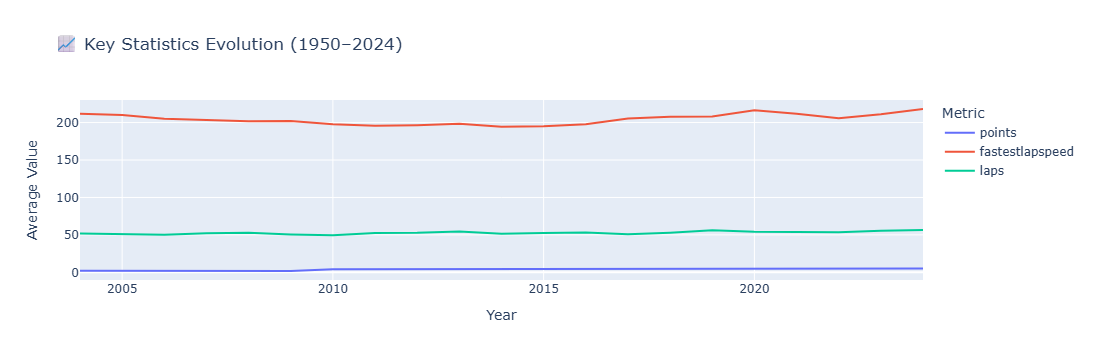

In [21]:
# Key Statistics Evolution
key_stats_long = key_stats.melt(id_vars='year', value_vars=cols_numeric, var_name='metric', value_name='value')

metric_color_map = {
    'points': '#ED1C24',           
    'fastestlapspeed': '#00A19B',  
    'laps': '#FF8000'              
}

fig_stats = px.line(
    key_stats_long,
    x='year',
    y='value',
    color='metric',
    title="📈 Key Statistics Evolution (1950–2024)"
)
fig_stats.update_layout(
    xaxis_title="Year",
    yaxis_title="Average Value",
    legend_title="Metric"
)
fig_stats.write_html("results/visualizations/dashboard1_key_stats_fixed.html")
fig_stats.show()


### Dashboard 2: Driver Analysis
	• Career trajectories
	• Head-to-head comparisons
	• Performance heatmaps


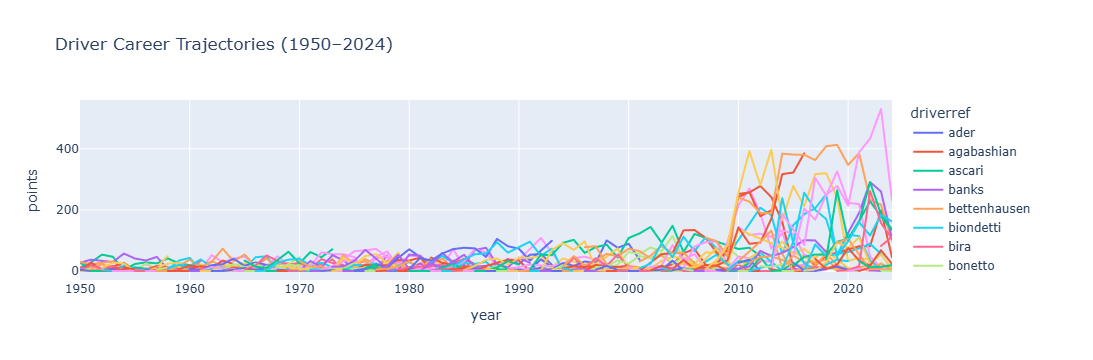

In [24]:
# Career Trajectories
career = (
    df.groupby(['year', 'driverref'])['points']
    .sum().reset_index()
)
fig_career = px.line(
    career, x='year', y='points', color='driverref',
    title="Driver Career Trajectories (1950–2024)"
)
fig_career.write_html("results/visualizations/dashboard2_career_trajectories.html")
fig_career.show()

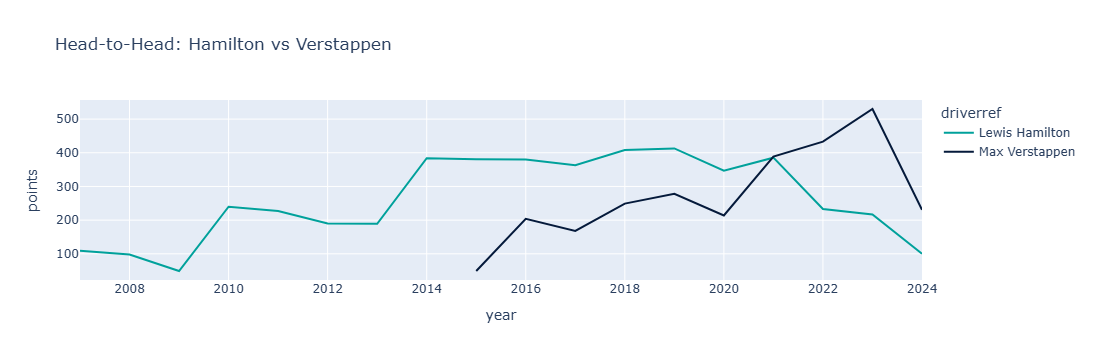

In [ ]:
# Head-to-Head Comparison (Hamilton vs Verstappen)
head2head = df[df['driverref'].isin(['hamilton', 'max_verstappen'])]
color_map = {
    'hamilton': '#00A19B',
    'max_verstappen': '#051A3B'
}
fig_h2h = px.line(
    head2head.groupby(['year','driverref'])['points'].sum().reset_index(),
    x='year', y='points', color='driverref',
    title="Head-to-Head: Hamilton vs Verstappen",
    color_discrete_map=color_map
)

fig_h2h.for_each_trace(
    lambda trace: trace.update(name='Lewis Hamilton' if trace.name == 'hamilton' else
                                         'Max Verstappen' if trace.name == 'max_verstappen' else trace.name)
)

fig_h2h.write_html("results/visualizations/dashboard2_head2head.html")
fig_h2h.show()

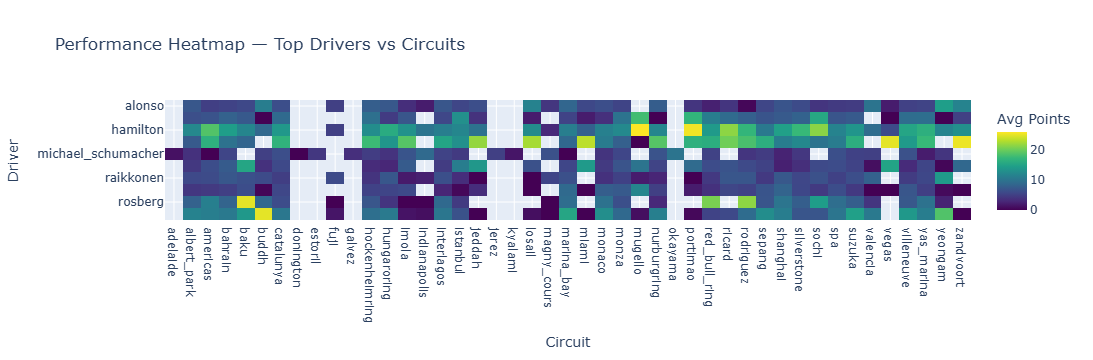

In [ ]:
# Performance Heatmap (Top Drivers vs Circuits) 

required_cols = ['driverref', 'circuitref', 'points']
missing_cols = [c for c in required_cols if c not in df.columns]
if missing_cols:
    print(f" Kolom berikut tidak ada di dataset: {missing_cols}")
else:
    
    top_drivers = (
        df.groupby('driverref')['points']
        .sum()
        .sort_values(ascending=False)
        .head(10)
        .index
    )

   
    heat_df = df[df['driverref'].isin(top_drivers)]

    
    pivot_df = (
        heat_df.groupby(['driverref', 'circuitref'])['points']
        .mean()
        .reset_index()
    )

    
    pivot_matrix = pivot_df.pivot(index='driverref', columns='circuitref', values='points')

    # Visualisasi Heatmap 
    fig_heat = px.imshow(
        pivot_matrix,
        color_continuous_scale='Viridis',
        title="Performance Heatmap — Top Drivers vs Circuits",
        labels=dict(x="Circuit", y="Driver", color="Avg Points"),
        aspect="auto"
    )

    
    fig_heat.write_html("results/visualizations/dashboard2_driver_performance_heatmap_top.html")

    
    fig_heat.show()


### Dashboard 3: Race Analytics
	• Circuit performance analysis
	• Strategy effectiveness
	• Real-time season tracking

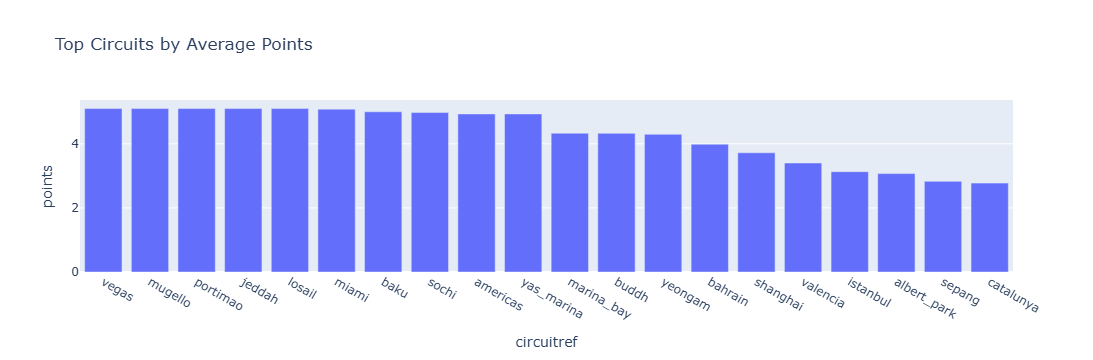

Kolom 'pitstops' tidak ditemukan — menggunakan proxy (laps/grid) sebagai indikator strategi.


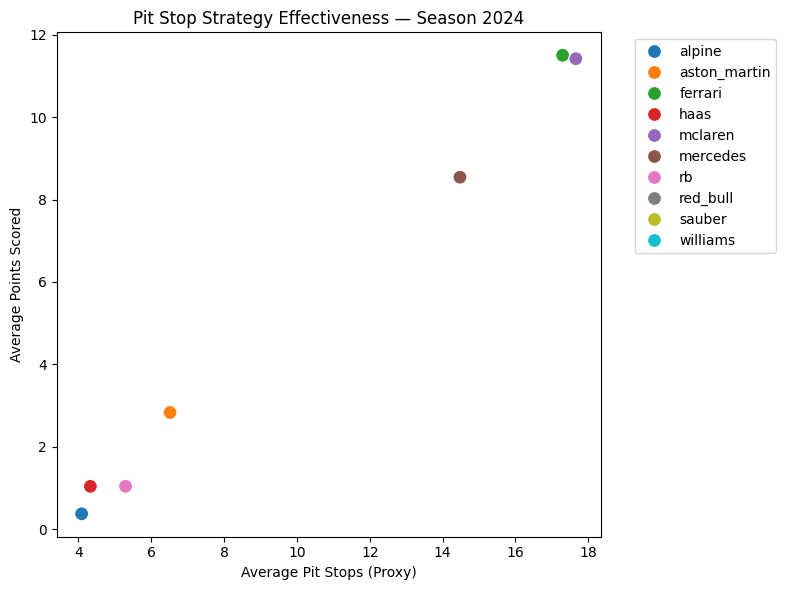

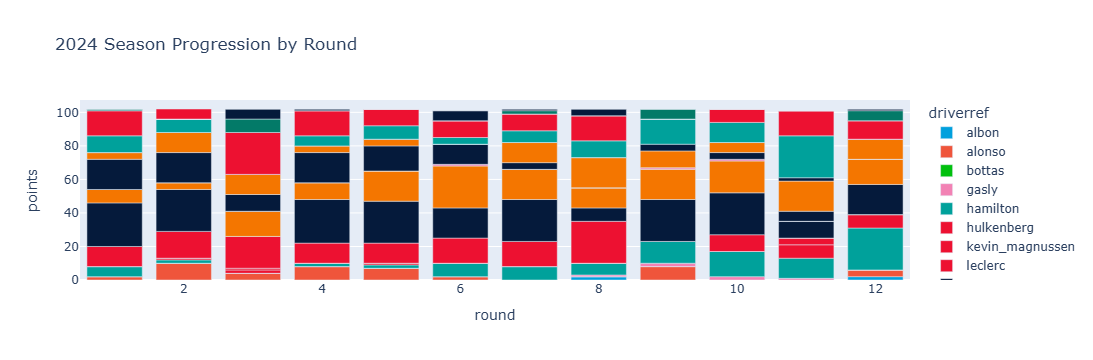

In [ ]:
# Circuit Performance Analysis
circuit_perf = (
    df.groupby('circuitref')['points']
    .mean().sort_values(ascending=False)
    .reset_index()
)
fig_circ = px.bar(
    circuit_perf.head(20),
    x='circuitref', y='points',
    title="Top Circuits by Average Points"
)
fig_circ.write_html("results/visualizations/dashboard3_circuit_perf.html")
fig_circ.show()

# Strategy Effectiveness (Grid vs Finish)
df_2024 = df[df['year'] == 2024].copy()

if 'pitstops' not in df_2024.columns:
    print("Kolom 'pitstops' tidak ditemukan — menggunakan proxy (laps/grid) sebagai indikator strategi.")
    df_2024['pitstops'] = (df_2024['laps'] / df_2024['grid']).fillna(0)

strategy_eff = (
    df_2024.groupby('constructorref')
    .agg(avg_pitstops=('pitstops', 'mean'),
         avg_points=('points', 'mean'),
         avg_position=('position', 'mean'))
    .reset_index()
)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=strategy_eff,
    x='avg_pitstops',
    y='avg_points',
    hue='constructorref',
    s=100,
    palette='tab10'
)
plt.title("Pit Stop Strategy Effectiveness — Season 2024")
plt.xlabel("Average Pit Stops (Proxy)")
plt.ylabel("Average Points Scored")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Real-Time Season Tracking 
season_2024 = df[df['year'] == 2024]
color_map_season_2024 = {
    'albon': '#00A0DD',
    'Alonso': '#037A68',
    'bottas': '#01C00E',
    'gasly': '#F282B4',
    'hamilton': '#00A19B',
    'hulkenberg': '#ED1131',
    'kevin_magnussen': '#ED1131',
    'leclerc': '#ED1131',
    'max_verstappen': '#051A3B',
    'norris': '#F47600',
    'ocon': '#F282B4',
    'perez': '#051A3B',
    'piastri': '#F47600',
    'ricciardo': '#051A3B',
    'russell': '#00A19B',
    'sainz': '#ED1131',
    'sargeant': '#00A0DD',
    'stroll': '#037A68',
    'tsunoda': '#051A3B',
    'zhou': '#01C00E',
    'bearman': '#ED1131'
}

fig_season = px.bar(
    season_2024.groupby(['round','driverref'])['points'].sum().reset_index(),
    x='round', y='points', color='driverref',
    title="2024 Season Progression by Round",
    color_discrete_map=color_map_season_2024
)
fig_season.write_html("results/visualizations/dashboard3_season_2024.html")
fig_season.show()

### Key Visualizations:
	• Sankey Diagrams: Driver career paths
	• Heatmaps: Performance correlations
	• Racing Lines: Lap time progressions
	• Network Graphs: Driver-team relationships
	• Geographic Maps: Global F1 expansion
	• Animation: Championship battles over time

C:\Users\Hp\AppData\Local\Temp\ipykernel_19796\1682384372.py:13: DtypeWarning:

Columns (4,37,39,41,43,45) have mixed types. Specify dtype option on import or set low_memory=False.



✅ Data Loaded: (26519, 60)


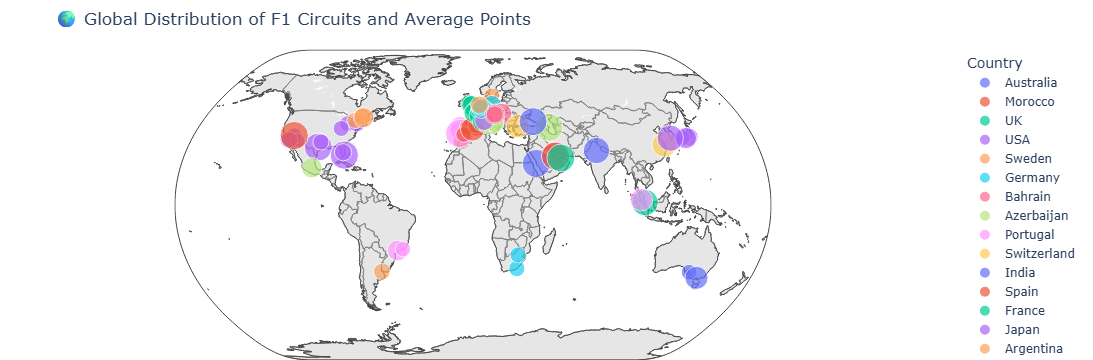

C:\Users\Hp\AppData\Local\Temp\ipykernel_19796\1682384372.py:78: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



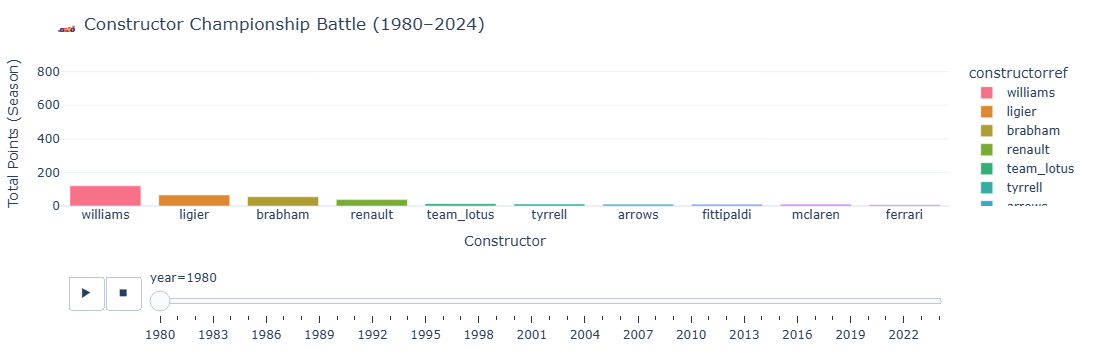

C:\Users\Hp\AppData\Local\Temp\ipykernel_19796\1682384372.py:117: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




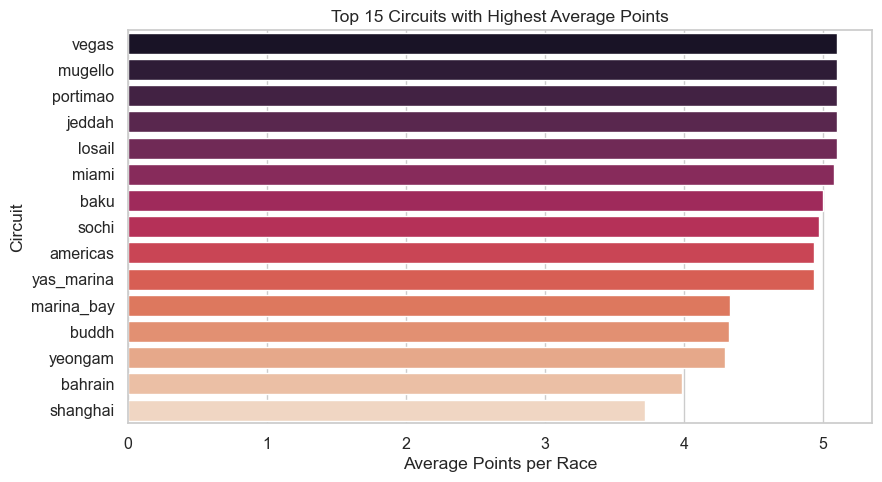

In [ ]:
# Key Visualizations 

import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.05)


df = pd.read_csv("data/processed/F1_Integrated_Features.csv")
df.replace("\\N", pd.NA, inplace=True)
df.columns = df.columns.str.lower()


for col in ['year', 'points', 'lat', 'lng']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("Data Loaded:", df.shape)

# GEOSPATIAL VISUALIZATION — GLOBAL CIRCUIT MAP

# Aggregate mean and total points by circuit
geo_df = (
    df.dropna(subset=['lat', 'lng', 'country'])
      .groupby(['circuitref', 'country', 'lat', 'lng'])
      .agg(total_points=('points', 'sum'),
           avg_points=('points', 'mean'),
           race_count=('raceid', 'nunique'))
      .reset_index()
)

# Normalize marker size for clarity
geo_df['marker_size'] = (geo_df['avg_points'] / geo_df['avg_points'].max()) * 40 + 8

# Create interactive map
fig = px.scatter_geo(
    geo_df,
    lat='lat',
    lon='lng',
    color='country',
    size='marker_size',
    hover_name='circuitref',
    hover_data={'avg_points': ':.2f', 'race_count': True, 'lat': False, 'lng': False},
    projection='natural earth',
    title="Global Distribution of F1 Circuits and Average Points",
)

fig.update_layout(
    geo=dict(
        showcountries=True,
        showland=True,
        landcolor="rgb(230, 230, 230)",
        countrycolor="gray",
    ),
    legend_title_text="Country",
    margin=dict(l=0, r=0, t=50, b=0)
)
fig.show()

# TEMPORAL ANIMATION — CONSTRUCTOR CHAMPIONSHIP EVOLUTION

# Aggregate yearly points by constructor
anim_df = (
    df.groupby(['year', 'constructorref'])['points']
      .sum()
      .reset_index()
)

# Filter realistic competition (only years with enough constructors)
anim_df = anim_df[anim_df['year'] >= 1980]  # focus modern era
anim_df = anim_df.groupby('year').apply(lambda x: x.nlargest(10, 'points')).reset_index(drop=True)

# Define clean color palette (static, readable)
palette = sns.color_palette("husl", 10).as_hex()

fig2 = px.bar(
    anim_df,
    x='constructorref',
    y='points',
    color='constructorref',
    animation_frame='year',
    range_y=[0, anim_df['points'].max() * 1.1],
    title="Constructor Championship Battle (1980–2024)",
    color_discrete_sequence=palette,
)

fig2.update_layout(
    xaxis=dict(title="Constructor", categoryorder='total descending'),
    yaxis_title="Total Points (Season)",
    transition={'duration': 700},
    template='plotly_white',
    margin=dict(l=40, r=40, t=60, b=40)
)
fig2.show()

# STATIC HEATMAP — CIRCUIT PERFORMANCE INTENSITY

circuit_perf = (
    df.groupby('circuitref')['points']
      .mean()
      .sort_values(ascending=False)
      .head(15)
      .reset_index()
)

plt.figure(figsize=(9,5))
sns.barplot(data=circuit_perf, y='circuitref', x='points', palette='rocket')
plt.title("Top 15 Circuits with Highest Average Points")
plt.xlabel("Average Points per Race")
plt.ylabel("Circuit")
plt.tight_layout()
plt.show()
